In [57]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

stud = pd.read_csv('student-mat.csv', sep=';')

In [58]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [59]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [60]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

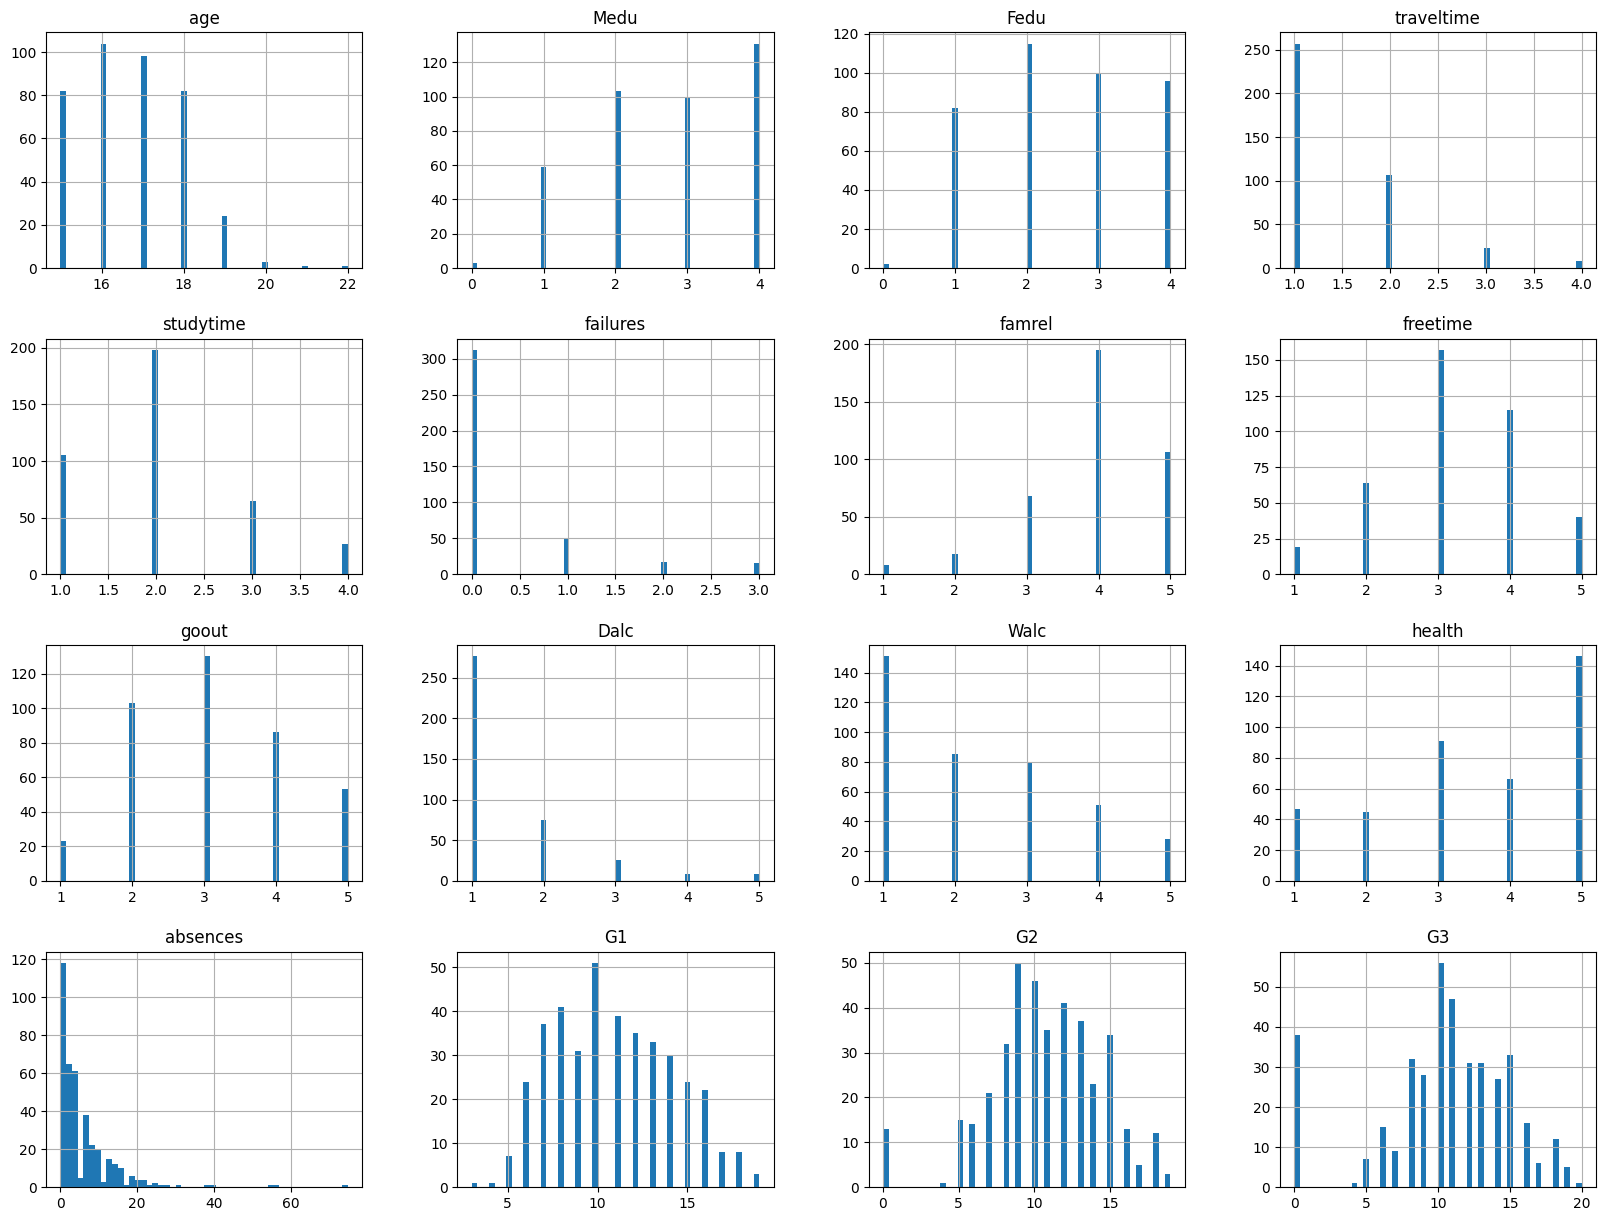

In [61]:
stud.hist(bins=50, figsize=(20,15))
plt.show()

In [62]:
np.random.seed(42)

def split_data(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_data(stud, 0.20)

In [63]:
stud = train_set.copy()

In [64]:
stud.info()


<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 181 to 102
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      316 non-null    object
 1   sex         316 non-null    object
 2   age         316 non-null    int64 
 3   address     316 non-null    object
 4   famsize     316 non-null    object
 5   Pstatus     316 non-null    object
 6   Medu        316 non-null    int64 
 7   Fedu        316 non-null    int64 
 8   Mjob        316 non-null    object
 9   Fjob        316 non-null    object
 10  reason      316 non-null    object
 11  guardian    316 non-null    object
 12  traveltime  316 non-null    int64 
 13  studytime   316 non-null    int64 
 14  failures    316 non-null    int64 
 15  schoolsup   316 non-null    object
 16  famsup      316 non-null    object
 17  paid        316 non-null    object
 18  activities  316 non-null    object
 19  nursery     316 non-null    object
 20  higher      3

In [65]:
type = stud.dtypes
print(type.iloc[0])
to_encode = []
for i in range(len(type)):
    if type.iloc[i] == 'object':
        to_encode.append(i)    
    
print(to_encode)


object
[0, 1, 3, 4, 5, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 22]


In [66]:
enc = OrdinalEncoder()
test_encode = stud.copy()


test_encode.iloc[:, to_encode] = enc.fit_transform(test_encode.iloc[:, to_encode])
test_encode.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
181,0.0,1.0,16,1.0,0.0,1.0,3,3,3.0,2.0,...,4,2,3,1,2,3,2,12,13,12
194,0.0,1.0,16,1.0,0.0,1.0,2,3,2.0,2.0,...,5,3,3,1,1,3,0,13,14,14
173,0.0,0.0,16,1.0,0.0,1.0,1,3,0.0,3.0,...,4,3,5,1,1,3,0,8,7,0
63,0.0,0.0,16,1.0,0.0,1.0,4,3,4.0,1.0,...,3,4,4,2,4,4,2,10,9,9
253,0.0,1.0,16,0.0,0.0,1.0,2,1,2.0,2.0,...,3,3,2,1,3,3,0,8,9,8


In [67]:
enc = OrdinalEncoder()

stud.iloc[:, to_encode] = enc.fit_transform(stud.iloc[:, to_encode])
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
181,0.0,1.0,16,1.0,0.0,1.0,3,3,3.0,2.0,...,4,2,3,1,2,3,2,12,13,12
194,0.0,1.0,16,1.0,0.0,1.0,2,3,2.0,2.0,...,5,3,3,1,1,3,0,13,14,14
173,0.0,0.0,16,1.0,0.0,1.0,1,3,0.0,3.0,...,4,3,5,1,1,3,0,8,7,0
63,0.0,0.0,16,1.0,0.0,1.0,4,3,4.0,1.0,...,3,4,4,2,4,4,2,10,9,9
253,0.0,1.0,16,0.0,0.0,1.0,2,1,2.0,2.0,...,3,3,2,1,3,3,0,8,9,8


<Axes: xlabel='G3', ylabel='internet'>

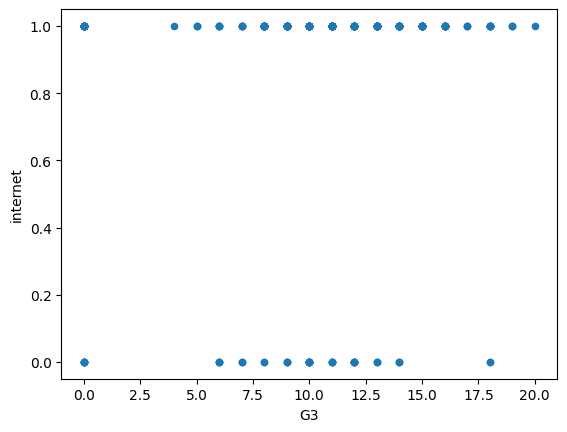

In [68]:
stud.plot(kind = 'scatter', y='internet', x='G3', alpha=1)

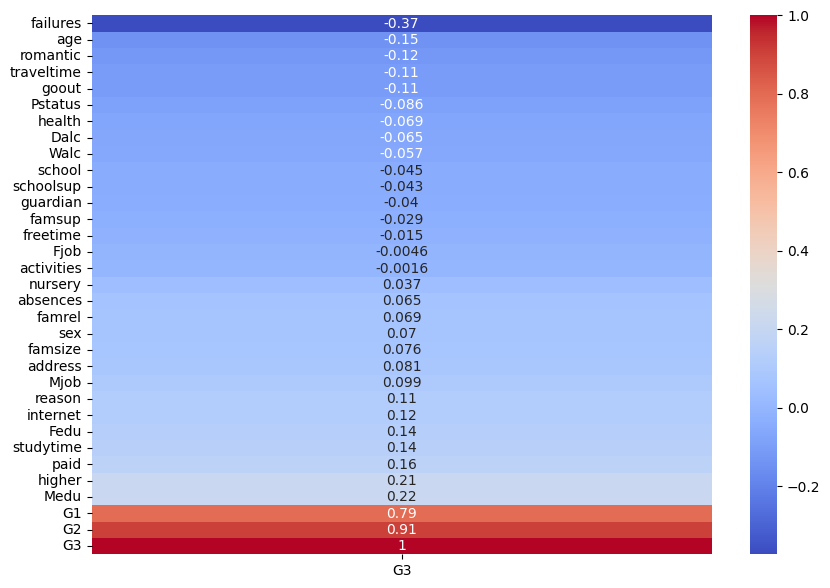

In [69]:
correlation_matrix = stud.corr()

sort = 'G3'
correlation_matrix = correlation_matrix.sort_values(by=sort, axis=0)

plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix[['G3']], annot=True, cmap='coolwarm')
plt.show()

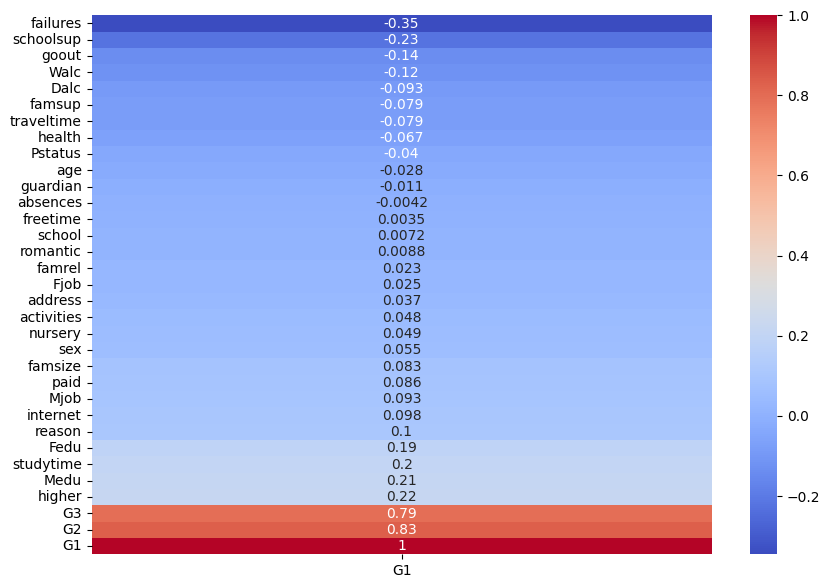

In [70]:
correlation_matrix = stud.corr()

sort = 'G1'
correlation_matrix = correlation_matrix.sort_values(by=sort, axis=0)

plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix[['G1']], annot=True, cmap='coolwarm')
plt.show()

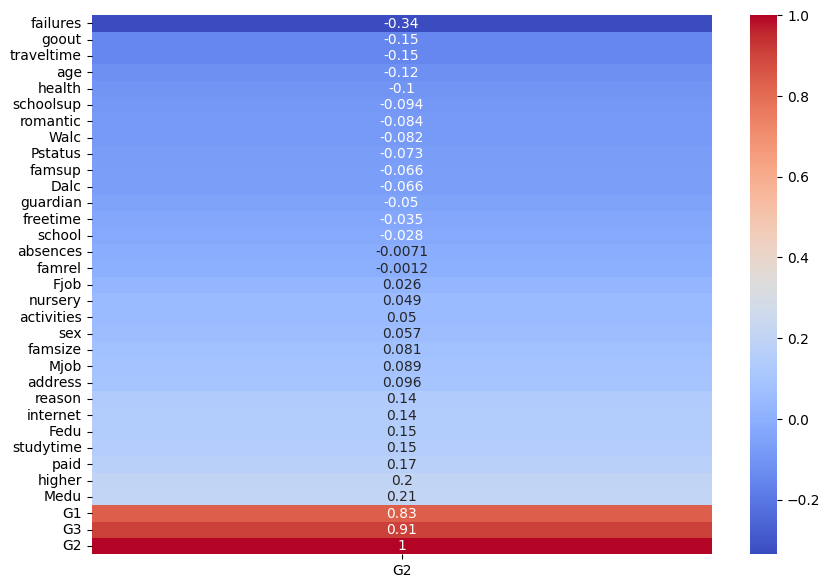

In [71]:
correlation_matrix = stud.corr()

sort = 'G2'
correlation_matrix = correlation_matrix.sort_values(by=sort, axis=0)

plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix[['G2']], annot=True, cmap='coolwarm')
plt.show()

In [72]:
print(correlation_matrix['G3'])

failures     -0.373769
goout        -0.106024
traveltime   -0.106752
age          -0.146241
health       -0.068857
schoolsup    -0.042566
romantic     -0.122786
Walc         -0.057363
Pstatus      -0.085990
famsup       -0.028604
Dalc         -0.064698
guardian     -0.039835
freetime     -0.015244
school       -0.044750
absences      0.064607
famrel        0.069409
Fjob         -0.004609
nursery       0.037218
activities   -0.001621
sex           0.069819
famsize       0.075983
Mjob          0.098627
address       0.081045
reason        0.114772
internet      0.119413
Fedu          0.135265
studytime     0.138200
paid          0.160374
higher        0.214106
Medu          0.215968
G1            0.791559
G3            1.000000
G2            0.907924
Name: G3, dtype: float64


In [73]:
correlation_matrix = stud.corr()

sort = 'G3'
correlation_matrix = correlation_matrix.sort_values(by=sort, axis=0)

#plt.figure(figsize=(10,7))
#sns.heatmap(correlation_matrix[['G3']], annot=True, cmap='coolwarm')
#plt.show()
to_drop = []

for column, corr in correlation_matrix.items():
    if abs(corr.iloc[0].item()) < 0.15:
        to_drop.append(column)
print(to_drop)
print(len(to_drop))



['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'activities', 'nursery', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
24


In [74]:
correlation_matrix['G3'].drop(to_drop)

failures   -0.373769
age        -0.146241
Fedu        0.135265
paid        0.160374
higher      0.214106
Medu        0.215968
G1          0.791559
G2          0.907924
G3          1.000000
Name: G3, dtype: float64

In [75]:
print(stud)

    school  sex  age address famsize Pstatus  Medu  Fedu Mjob Fjob  ...  \
181    0.0  1.0   16     1.0     0.0     1.0     3     3  3.0  2.0  ...   
194    0.0  1.0   16     1.0     0.0     1.0     2     3  2.0  2.0  ...   
173    0.0  0.0   16     1.0     0.0     1.0     1     3  0.0  3.0  ...   
63     0.0  0.0   16     1.0     0.0     1.0     4     3  4.0  1.0  ...   
253    0.0  1.0   16     0.0     0.0     1.0     2     1  2.0  2.0  ...   
..     ...  ...  ...     ...     ...     ...   ...   ...  ...  ...  ...   
71     0.0  1.0   15     1.0     0.0     1.0     4     2  2.0  2.0  ...   
106    0.0  0.0   15     1.0     0.0     1.0     2     2  2.0  2.0  ...   
270    0.0  0.0   19     1.0     0.0     1.0     3     3  2.0  3.0  ...   
348    0.0  0.0   17     1.0     0.0     1.0     4     3  1.0  2.0  ...   
102    0.0  1.0   15     1.0     0.0     1.0     4     4  3.0  2.0  ...   

    famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
181      4        2      3    

In [76]:
X = stud.drop(columns = to_drop)
print(X)

     age  Medu  Fedu  failures paid higher  G1  G2  G3
181   16     3     3         0  1.0    1.0  12  13  12
194   16     2     3         0  0.0    1.0  13  14  14
173   16     1     3         3  0.0    1.0   8   7   0
63    16     4     3         0  1.0    1.0  10   9   9
253   16     2     1         0  0.0    1.0   8   9   8
..   ...   ...   ...       ...  ...    ...  ..  ..  ..
71    15     4     2         0  0.0    1.0  10  10  10
106   15     2     2         0  1.0    1.0   7   8   8
270   19     3     3         2  1.0    1.0   9   9   9
348   17     4     3         0  1.0    1.0  13  15  15
102   15     4     4         0  0.0    1.0  10  13  14

[316 rows x 9 columns]


In [77]:
print(X)
y_train = X['G3']
X_train = X.drop(columns = ['G3'])
print(y_train)
print(X_train)

     age  Medu  Fedu  failures paid higher  G1  G2  G3
181   16     3     3         0  1.0    1.0  12  13  12
194   16     2     3         0  0.0    1.0  13  14  14
173   16     1     3         3  0.0    1.0   8   7   0
63    16     4     3         0  1.0    1.0  10   9   9
253   16     2     1         0  0.0    1.0   8   9   8
..   ...   ...   ...       ...  ...    ...  ..  ..  ..
71    15     4     2         0  0.0    1.0  10  10  10
106   15     2     2         0  1.0    1.0   7   8   8
270   19     3     3         2  1.0    1.0   9   9   9
348   17     4     3         0  1.0    1.0  13  15  15
102   15     4     4         0  0.0    1.0  10  13  14

[316 rows x 9 columns]
181    12
194    14
173     0
63      9
253     8
       ..
71     10
106     8
270     9
348    15
102    14
Name: G3, Length: 316, dtype: int64
     age  Medu  Fedu  failures paid higher  G1  G2
181   16     3     3         0  1.0    1.0  12  13
194   16     2     3         0  0.0    1.0  13  14
173   16     1   

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [80]:
predictions = LinReg.predict(X_train)
print(np.round(predictions))

[13. 14.  5.  9.  9.  7. 13.  4. 11. 15.  0. 13.  9. 11.  9.  5.  7.  9.
 18. 19. 14. 13. 12.  4. 10. 11.  5.  9.  6.  9.  8.  5.  4. 11.  4.  9.
 19.  7.  6. 15.  9. 11.  9.  9. 15. 13. 12. 12.  6. -2.  7. 12. 11. 13.
  4. 18. 17.  5. 11. 17. 12.  9. 12. 11. 17.  9. 11. 15. 12.  9. 14.  3.
  8.  7.  6. 10. 11. 13.  9. 13.  9.  8.  5.  5. 11. 16.  6. 17. 11. 15.
 14. 15.  9.  9.  9. 13. 16. -2. 13.  7.  8.  9. 12. 12.  8. 13.  5. 10.
  7. -1. 10.  7. 15.  9. 13.  8.  5. 10. 13.  7. 19. 12. 12.  9. 12. 13.
 12. 10. 17.  8. 14. 15. 10. 10.  8. 12.  6.  5. -0. 11.  9.  9.  3.  6.
 10. 15.  8. 11. 12. 16. 13. 13. 12. 15. 12. 11.  6. 12. 11. 12. 16. 15.
 18.  8.  8. 11. -0. 13. 19.  9. 11. 16. 12.  8. -0. 12. 15. 11. 14.  7.
 11.  3. 11. 12.  9.  4.  9. 13. 12. 13. 11.  8. 12.  5.  6. 11. 10.  9.
 13.  7.  6. 16.  7.  6. 15. 14. 15.  8. 20. 17. 10. 17. 13. 17. 13. 13.
 18. 14. -1. 15. 12.  9.  0.  2. 19. 10. 10. 16. 12.  9. 12. 11.  4. 11.
  9. 13. 12. 13. 12. 14.  9.  9. 12. 18. -1.  9.  7

In [81]:
#print(y)
X_test = test_set.copy()

X_test.iloc[:, to_encode] = enc.fit_transform(X_test.iloc[:, to_encode])

y_test = X_test['G3']
X_test = X_test.drop(columns = to_drop)
X_test = X_test.drop(columns = 'G3')



print(X_test)
predictions = LinReg.predict(X_test)

     age  Medu  Fedu  failures paid higher  G1  G2
78    17     2     1         3  0.0    0.0   8   8
371   18     1     2         0  1.0    0.0  14  12
248   18     3     3         1  0.0    1.0   3   5
55    16     2     1         0  1.0    1.0   8   9
390   20     2     2         2  1.0    1.0   9   9
..   ...   ...   ...       ...  ...    ...  ..  ..
364   17     1     2         0  0.0    1.0  12  11
82    15     3     2         0  1.0    1.0   7   6
114   15     2     1         0  0.0    1.0   9   9
3     15     4     2         0  1.0    1.0  15  14
18    17     3     2         3  0.0    1.0   6   5

[79 rows x 8 columns]


In [82]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

Root Mean Squared Error:  2.147726683010866


In [83]:
LinReg2 = LinearRegression()
X_test2 = test_set.copy()
X_test2.iloc[:, to_encode] = enc.fit_transform(X_test2.iloc[:, to_encode])
y_test2 = X_test2['G3']
X_test2 = X_test2.drop(columns = ['G3', 'G1', 'G2'])

X_train2 = train_set.copy()
X_train2.iloc[:, to_encode] = enc.fit_transform(X_train2.iloc[:, to_encode])
y_train2 = X_train2['G3']
X_train2 = X_train2.drop(columns = ['G3', 'G1', 'G2'])

LinReg2.fit(X_train2, y_train2)

predictions2 = LinReg2.predict(X_test2)

mse = mean_squared_error(y_test2, predictions2)
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

Root Mean Squared Error:  4.306234278514979


In [84]:
X = stud.drop(columns = to_drop)
print(X)


y = X['G3']
X_train = X.drop(columns = ['G3', 'G1', 'G2'])
print(y)
print(X_train)

LinReg = LinearRegression()
LinReg.fit(X_train, y)
predictions = LinReg.predict(X_train)

X_test = test_set.copy()

X_test.iloc[:, to_encode] = enc.fit_transform(X_test.iloc[:, to_encode])

y_test = X_test['G3']
X_test = X_test.drop(columns = to_drop)
X_test = X_test.drop(columns = ['G3', 'G1', 'G2'])



print(X_test)
predictions = LinReg.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

     age  Medu  Fedu  failures paid higher  G1  G2  G3
181   16     3     3         0  1.0    1.0  12  13  12
194   16     2     3         0  0.0    1.0  13  14  14
173   16     1     3         3  0.0    1.0   8   7   0
63    16     4     3         0  1.0    1.0  10   9   9
253   16     2     1         0  0.0    1.0   8   9   8
..   ...   ...   ...       ...  ...    ...  ..  ..  ..
71    15     4     2         0  0.0    1.0  10  10  10
106   15     2     2         0  1.0    1.0   7   8   8
270   19     3     3         2  1.0    1.0   9   9   9
348   17     4     3         0  1.0    1.0  13  15  15
102   15     4     4         0  0.0    1.0  10  13  14

[316 rows x 9 columns]
181    12
194    14
173     0
63      9
253     8
       ..
71     10
106     8
270     9
348    15
102    14
Name: G3, Length: 316, dtype: int64
     age  Medu  Fedu  failures paid higher
181   16     3     3         0  1.0    1.0
194   16     2     3         0  0.0    1.0
173   16     1     3         3  0.0    1.